In [1]:
from glob import glob

glob("/home/addinedu/dev_ws/data/*")

['/home/addinedu/dev_ws/data/2013.csv',
 '/home/addinedu/dev_ws/data/titanic.xls',
 '/home/addinedu/dev_ws/data/2014.csv',
 '/home/addinedu/dev_ws/data/02. us-states.json',
 '/home/addinedu/dev_ws/data/2015.csv',
 '/home/addinedu/dev_ws/data/02. crime_in_Seoul_final.csv',
 '/home/addinedu/dev_ws/data/02. skorea_municipalities_geo_simple.json',
 '/home/addinedu/dev_ws/data/2016년.csv',
 '/home/addinedu/dev_ws/data/02. US_Unemployment_Oct2012.csv']

In [2]:
target_path = "/home/addinedu/dev_ws/data"
file_list = glob(target_path+'/20*.csv')
file_list

['/home/addinedu/dev_ws/data/2013.csv',
 '/home/addinedu/dev_ws/data/2014.csv',
 '/home/addinedu/dev_ws/data/2015.csv',
 '/home/addinedu/dev_ws/data/2016년.csv']

In [3]:
for each_file in file_list:
    print(each_file)

/home/addinedu/dev_ws/data/2013.csv
/home/addinedu/dev_ws/data/2014.csv
/home/addinedu/dev_ws/data/2015.csv
/home/addinedu/dev_ws/data/2016년.csv


In [4]:
import pandas as pd
import numpy as np

crime_raw_data = pd.read_csv(file_list[0],
                             usecols=[0,1,2,3], encoding='euc-kr')

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=["구분"], columns=["죄종","발생검거"], aggfunc=[np.sum])

crime_station.columns = ['강간검거', '강간', '강도검거', '강도', '살인검거', '살인', '절도검거', '절도', '폭력검거', '폭력']

crime_station['year'] = 2000
crime_station.head()

/tmp/ipykernel_23165/111574292.py:7: FutureWarning: The provided callable <function sum at 0x7f9af8112320> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(


,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
구분,,,,,,,,,,,
강남,223.0,325.0,9.0,16.0,6.0,6.0,716.0,2750.0,2418.0,2916.0,2000
강동,130.0,152.0,11.0,17.0,9.0,9.0,722.0,2546.0,2362.0,2810.0,2000
강북,170.0,202.0,18.0,16.0,2.0,2.0,571.0,1464.0,2084.0,2336.0,2000
강서,224.0,270.0,24.0,26.0,12.0,14.0,949.0,2638.0,2395.0,3028.0,2000
관악,209.0,374.0,17.0,24.0,6.0,7.0,753.0,3447.0,2733.0,3385.0,2000


In [5]:
crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding='euc-kr')

    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index=["구분"], columns=["죄종", "발생검거"], aggfunc=[np.sum])

    crime_station.columns = ['강간검거', '강간', '강도검거', '강도', '살인검거', '살인', '절도검거', '절도', '폭력검거', '폭력']
    crime_station['year'] = each_file.split('/')[-1][:4]
    crime_station_t.append(crime_station)
    
crime_total = pd.concat(crime_station_t)
crime_total.head()

/tmp/ipykernel_23165/996974973.py:6: FutureWarning: The provided callable <function sum at 0x7f9af8112320> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(
/tmp/ipykernel_23165/996974973.py:6: FutureWarning: The provided callable <function sum at 0x7f9af8112320> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(
/tmp/ipykernel_23165/996974973.py:6: FutureWarning: The provided callable <function sum at 0x7f9af8112320> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crime_station = crime_raw_data.pivot_table(
/tmp/ipykernel_23165/9

,강간검거,강간,강도검거,강도,살인검거,살인,절도검거,절도,폭력검거,폭력,year
구분,,,,,,,,,,,
강남,223.0,325.0,9.0,16.0,6.0,6.0,716.0,2750.0,2418.0,2916.0,2013
강동,130.0,152.0,11.0,17.0,9.0,9.0,722.0,2546.0,2362.0,2810.0,2013
강북,170.0,202.0,18.0,16.0,2.0,2.0,571.0,1464.0,2084.0,2336.0,2013
강서,224.0,270.0,24.0,26.0,12.0,14.0,949.0,2638.0,2395.0,3028.0,2013
관악,209.0,374.0,17.0,24.0,6.0,7.0,753.0,3447.0,2733.0,3385.0,2013


In [6]:
print(list(crime_total.columns))
print(list(crime_total.index))

['강간검거', '강간', '강도검거', '강도', '살인검거', '살인', '절도검거', '절도', '폭력검거', '폭력', 'year']
['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉', '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서', '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화', '강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉', '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서', '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화', '강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉', '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서', '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화', '강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉', '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서', '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화']


In [7]:
crime_total_murder = crime_total.pivot_table(index='year', columns='구분', values='살인', aggfunc='sum')
crime_total_murder.reset_index(inplace=True)
crime_total_murder




구분,year,강남,강동,강북,강서,관악,광진,구로,금천,남대문,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
0,2013,6.0,9.0,2.0,14.0,7.0,4.0,9.0,6.0,1.0,...,6.0,3.0,14.0,4.0,5.0,2.0,1.0,6.0,0.0,2.0
1,2014,8.0,5.0,6.0,8.0,7.0,8.0,3.0,7.0,3.0,...,5.0,5.0,14.0,1.0,5.0,3.0,2.0,11.0,3.0,0.0
2,2015,3.0,4.0,7.0,7.0,9.0,4.0,8.0,3.0,1.0,...,10.0,3.0,14.0,5.0,1.0,3.0,3.0,13.0,2.0,3.0
3,2016,3.0,4.0,7.0,9.0,6.0,4.0,9.0,6.0,1.0,...,2.0,5.0,13.0,4.0,2.0,4.0,2.0,8.0,2.0,2.0


In [8]:
import matplotlib as mpl
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

mpl.font_manager._rebuild()
plt.rc('font', family='NanumBarunGothic')


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

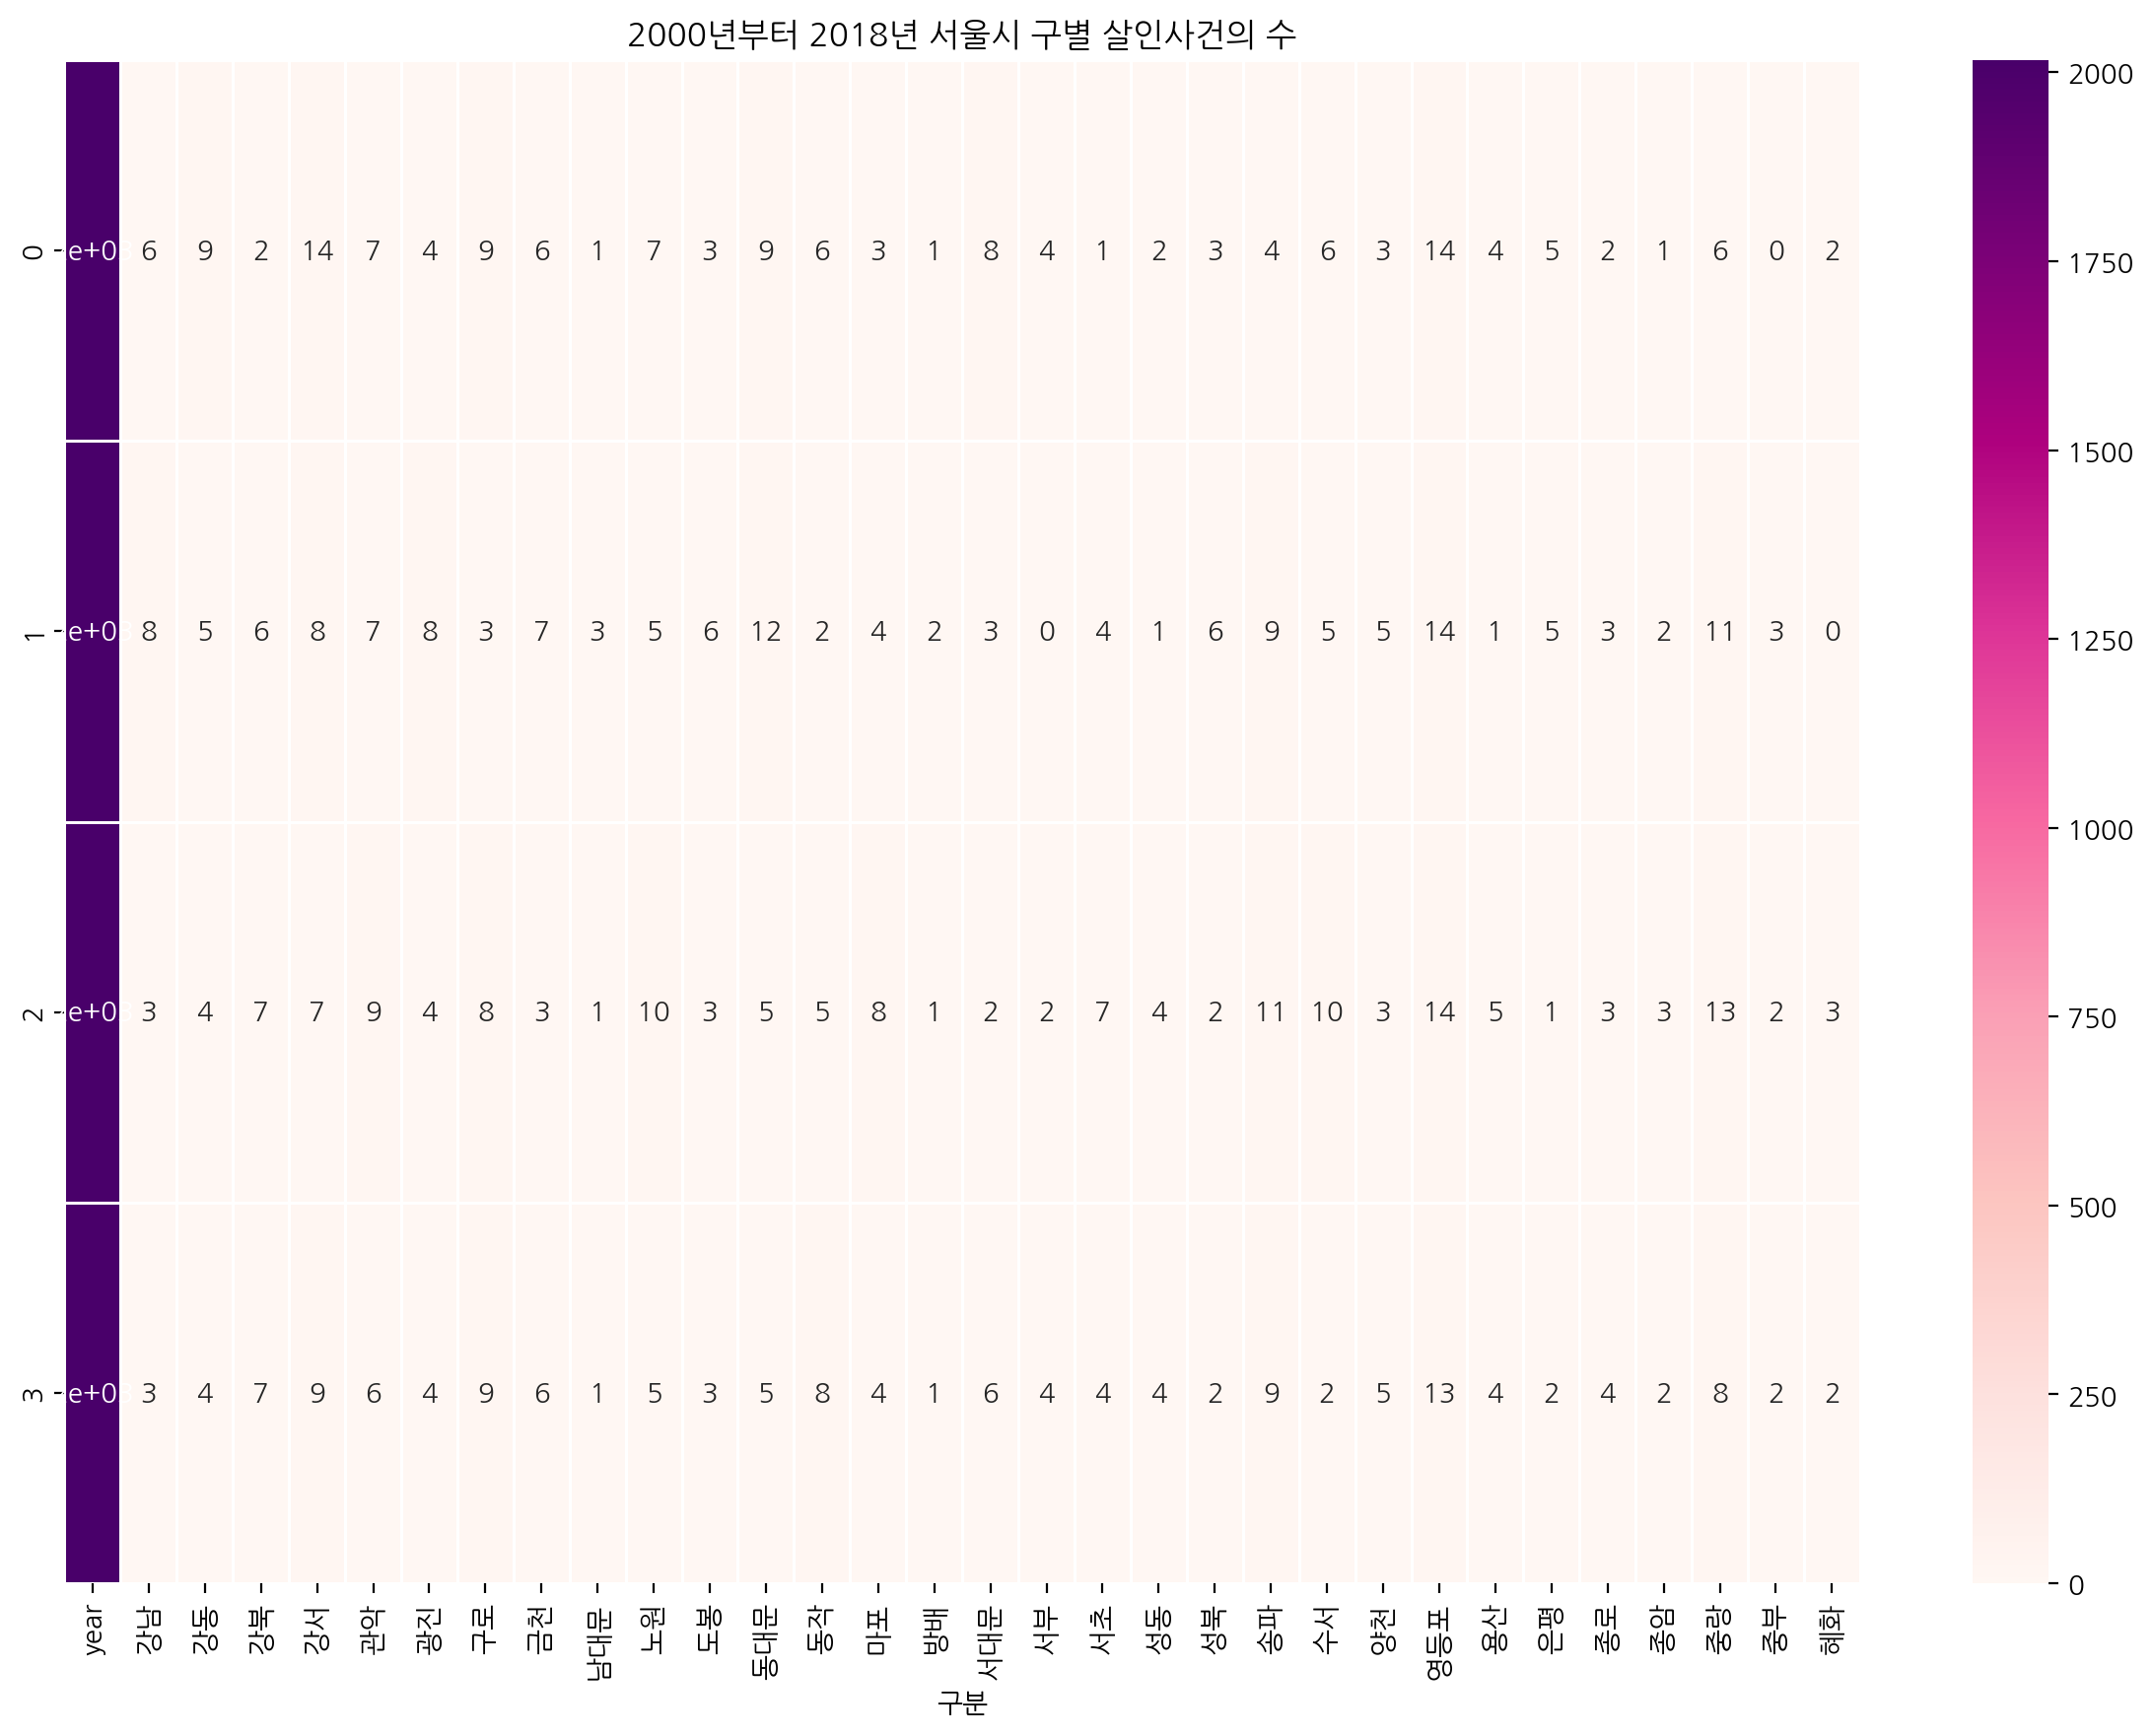

In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import koreanize_matplotlib

crime_total_murder = crime_total_murder.astype(float)

plt.figure(figsize= (13,10))
sns.heatmap(crime_total_murder, annot=True, linewidths=.5, cmap='RdPu')
plt.title('2000년부터 2018년 서울시 구별 살인사건의 수')
plt.autoscale()
plt.tight_layout(pad=5)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/home/addinedu/venv/eda_venv/lib/python3.10/site-packages/IPytho

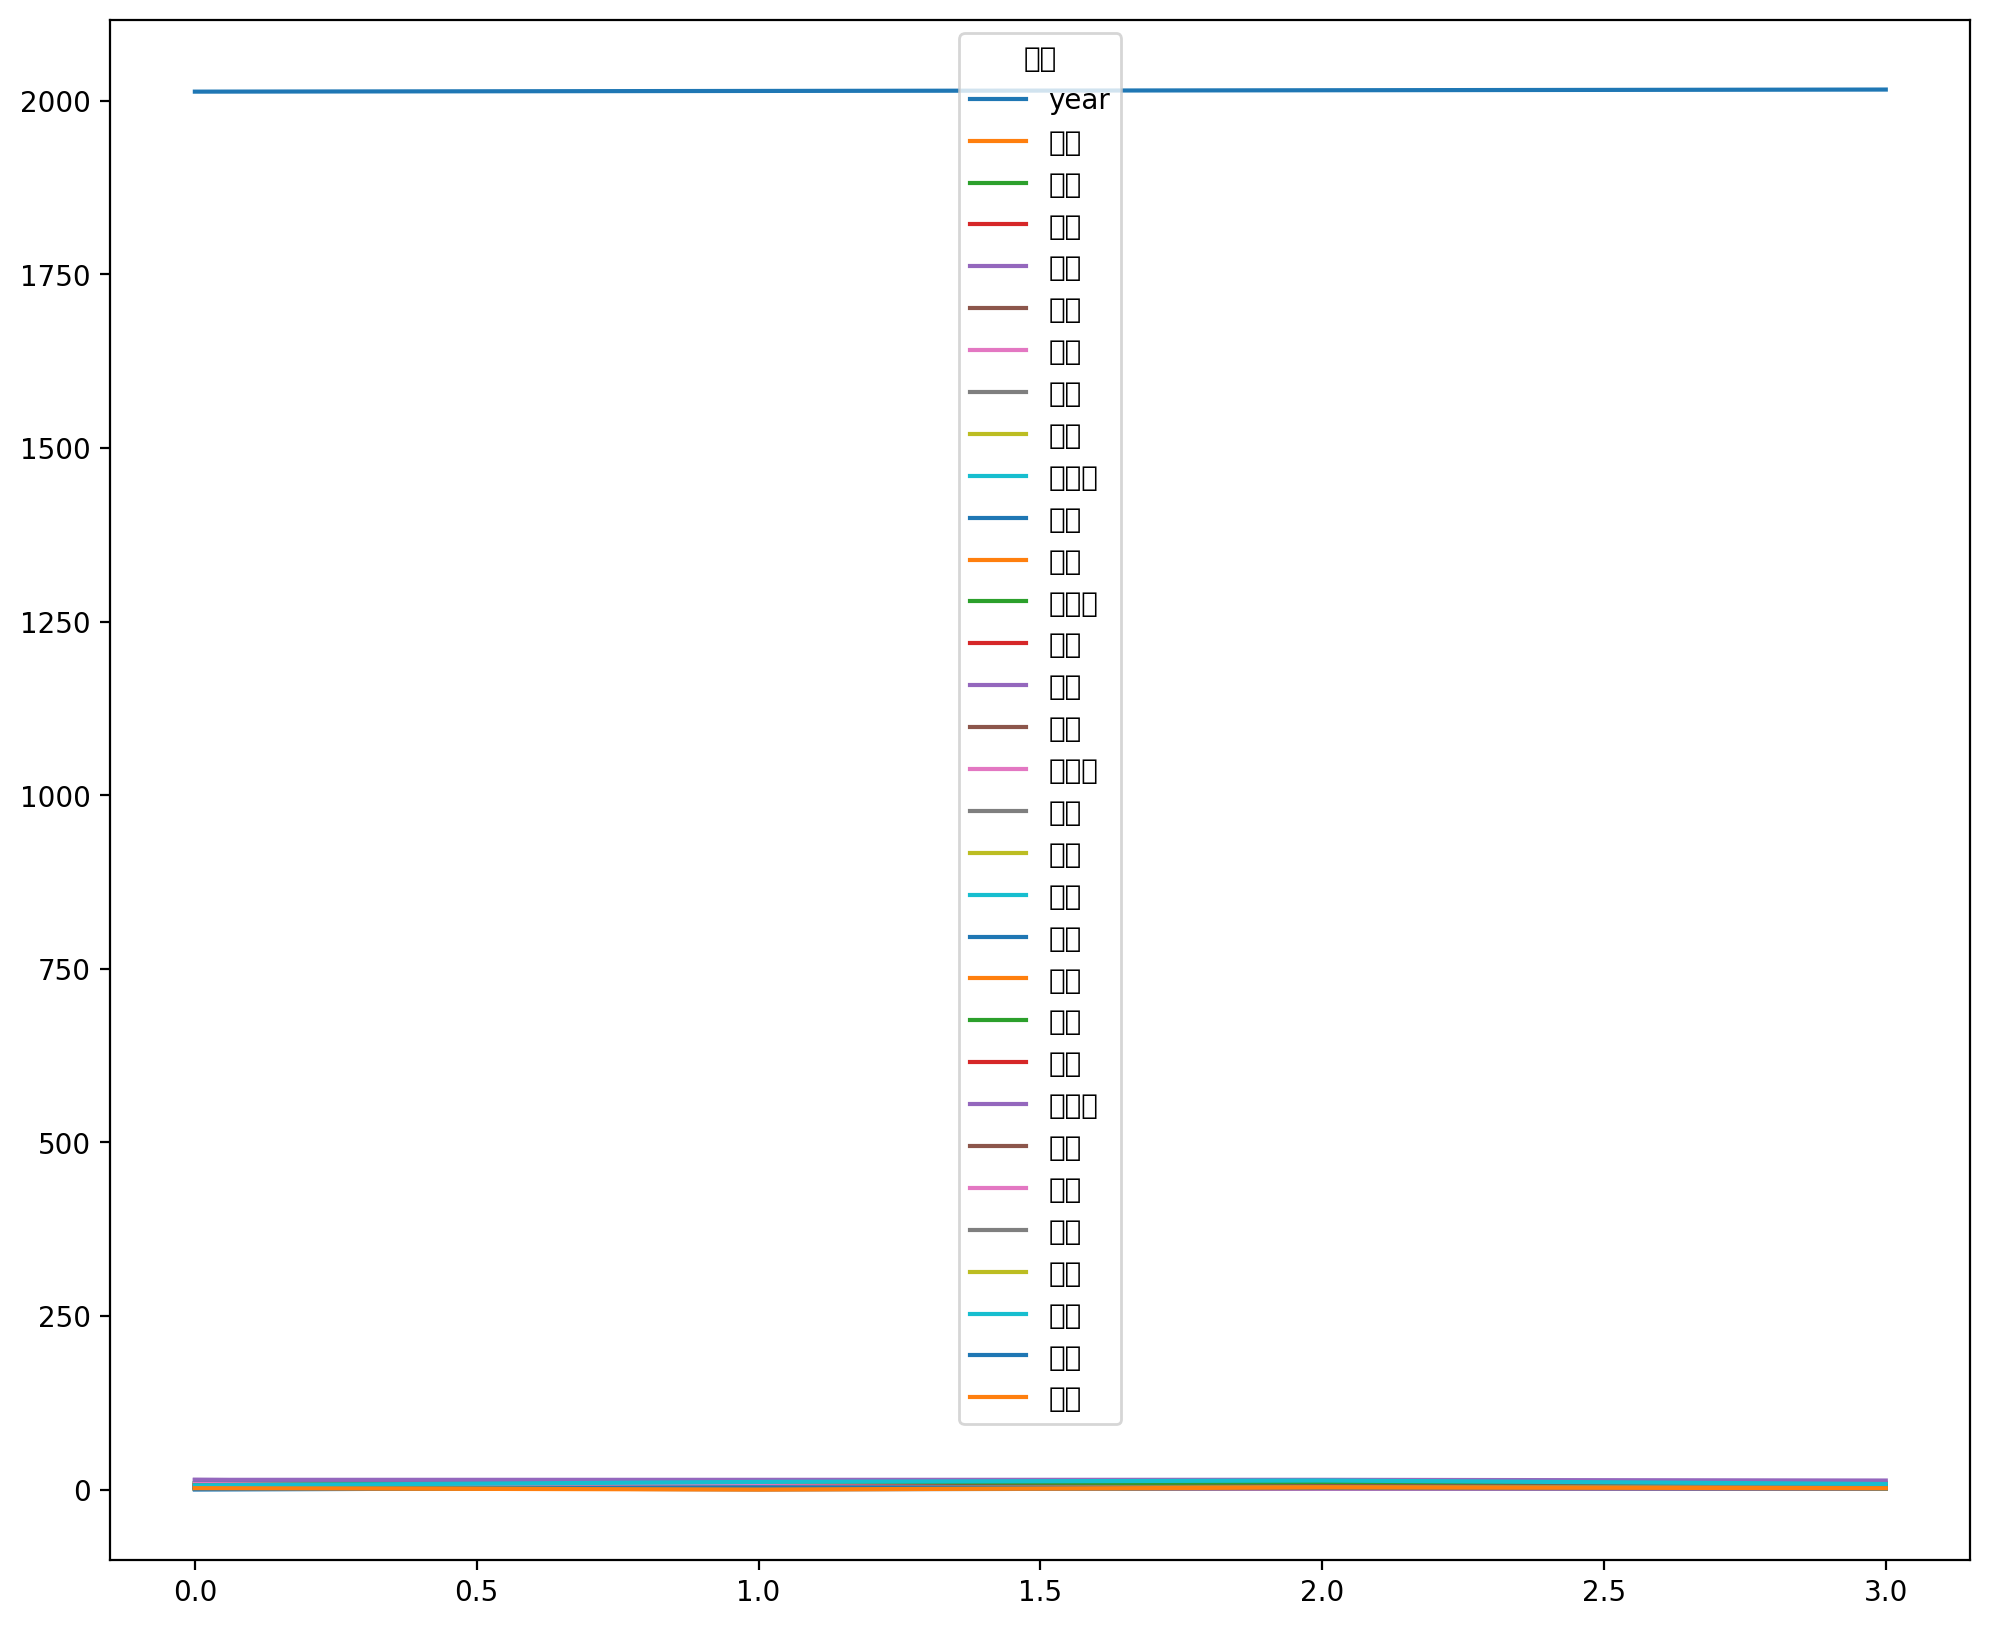

In [ ]:
crime_total_murder.plot(figsize=(12,10))
plt.show